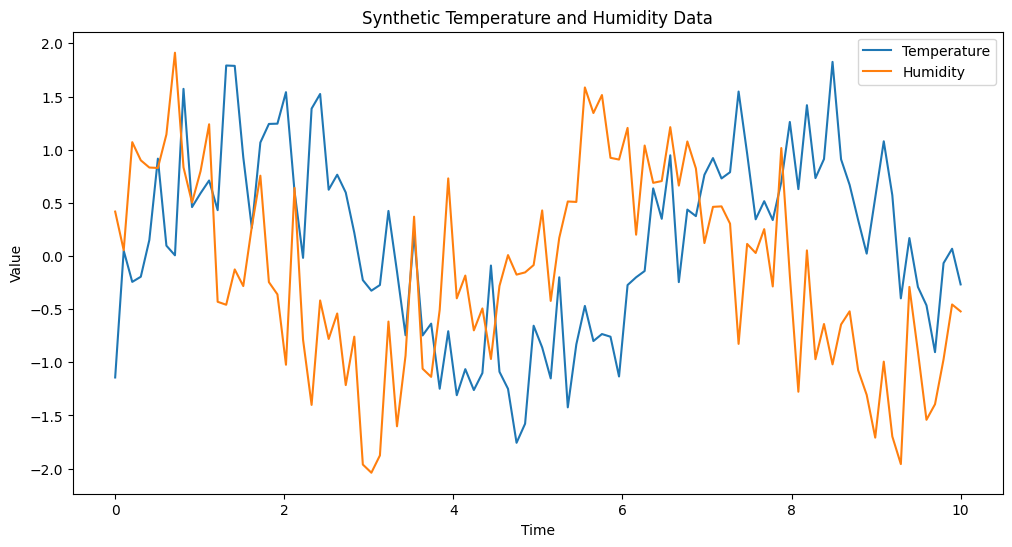

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import gpytorch

# Generate synthetic data
times = np.linspace(0, 10, 100)
temperature = np.sin(times) + 0.5 * np.random.randn(100)  # sine wave + noise
humidity = np.cos(times) + 0.5 * np.random.randn(100)  # cosine wave + noise

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(times, temperature, label="Temperature")
plt.plot(times, humidity, label="Humidity")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.title("Synthetic Temperature and Humidity Data")
plt.show()


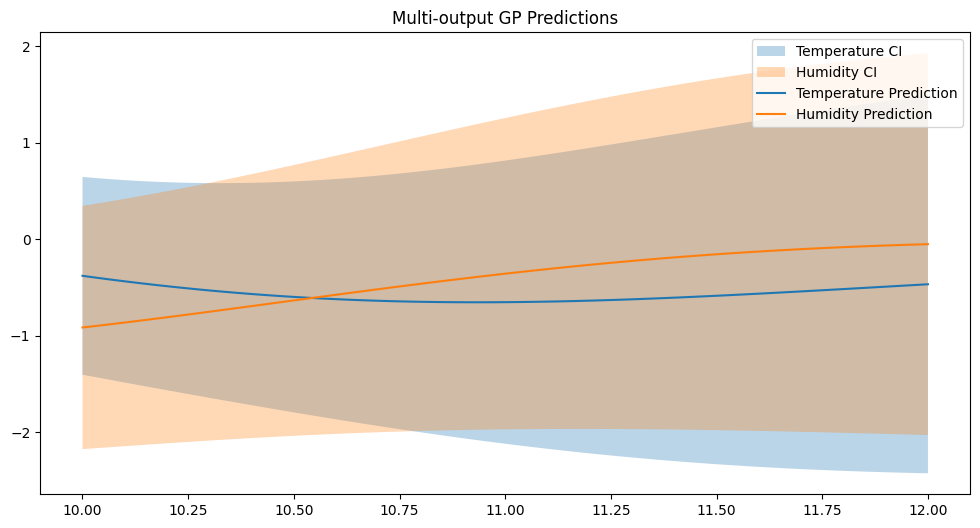

In [3]:
# Convert data to torch tensors
train_x = torch.tensor(times).float()
train_y = torch.stack([torch.tensor(temperature), torch.tensor(humidity)], -1).float()

# Define the multi-output GP model
class MultiOutputGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(MultiOutputGPModel, self).__init__(train_x, train_y, likelihood)
        
        self.mean_module = gpytorch.means.MultitaskMean(
            gpytorch.means.ConstantMean(), num_tasks=2
        )
        self.covar_module = gpytorch.kernels.MultitaskKernel(
            gpytorch.kernels.RBFKernel(), num_tasks=2, rank=1
        )
    
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultitaskMultivariateNormal(mean_x, covar_x)

likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=2)
model = MultiOutputGPModel(train_x, train_y, likelihood)

# Training
model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(50):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Make predictions
model.eval()
likelihood.eval()

test_x = torch.linspace(10, 12, 100)
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = likelihood(model(test_x))
    mean = observed_pred.mean
    lower, upper = observed_pred.confidence_region()

# Plot predictions
plt.figure(figsize=(12, 6))
plt.fill_between(test_x, lower[:, 0], upper[:, 0], alpha=0.3, label="Temperature CI")
plt.fill_between(test_x, lower[:, 1], upper[:, 1], alpha=0.3, label="Humidity CI")
plt.plot(test_x, mean[:, 0], label="Temperature Prediction")
plt.plot(test_x, mean[:, 1], label="Humidity Prediction")
plt.legend()
plt.title("Multi-output GP Predictions")
plt.show()


### ITF training course slides

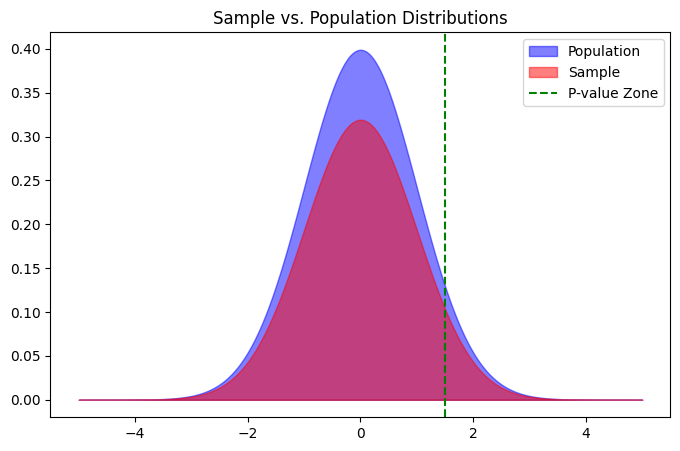

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of values
x = np.linspace(-5, 5, 400)

# Generate two normal distributions
y1 = np.exp(-x**2/2)/np.sqrt(2*np.pi)
y2 = y1 * 0.8

plt.figure(figsize=(8, 5))

plt.fill_between(x, y1, color="blue", alpha=0.5, label="Population")
plt.fill_between(x, y2, color="red", alpha=0.5, label="Sample")
plt.axvline(x=1.5, color="green", linestyle="--", label="P-value Zone")

plt.legend()
plt.title("Sample vs. Population Distributions")
plt.savefig("slide1.png")
plt.show()


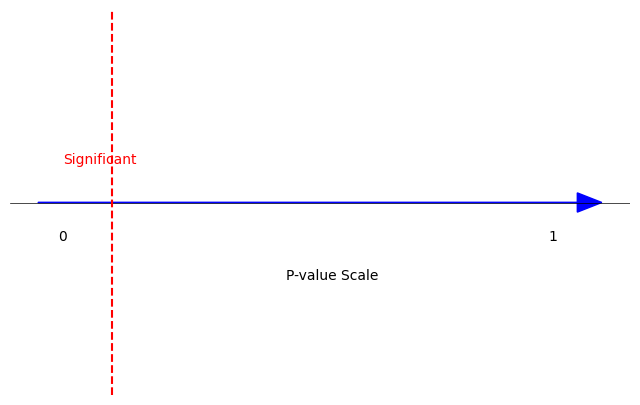

In [2]:
plt.figure(figsize=(8, 5))

plt.axhline(0, color="black", linewidth=0.5)
plt.arrow(-0.1, 0, 1.1, 0, head_width=0.05, head_length=0.05, fc="blue", ec="blue")
plt.text(0.5, -0.2, "P-value Scale", horizontalalignment='center')
plt.text(0.95, -0.1, "1", horizontalalignment='center')
plt.text(-0.05, -0.1, "0", horizontalalignment='center')
plt.axvline(x=0.05, color="red", linestyle="--")

plt.text(0.025, 0.1, "Significant", color="red", horizontalalignment='center')
plt.ylim(-0.5, 0.5)

plt.axis('off')
plt.savefig("slide2.png")
plt.show()


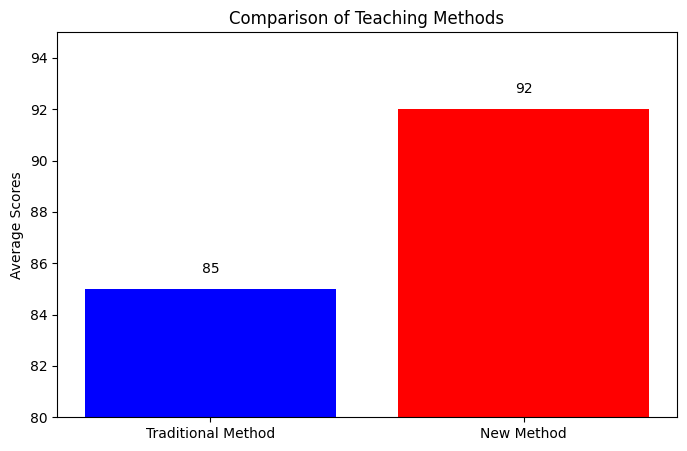

In [3]:
labels = ["Traditional Method", "New Method"]
scores = [85, 92]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, scores, color=['blue', 'red'])

plt.ylim(80, 95)
plt.ylabel("Average Scores")
plt.title("Comparison of Teaching Methods")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.savefig("slide3.png")
plt.show()
